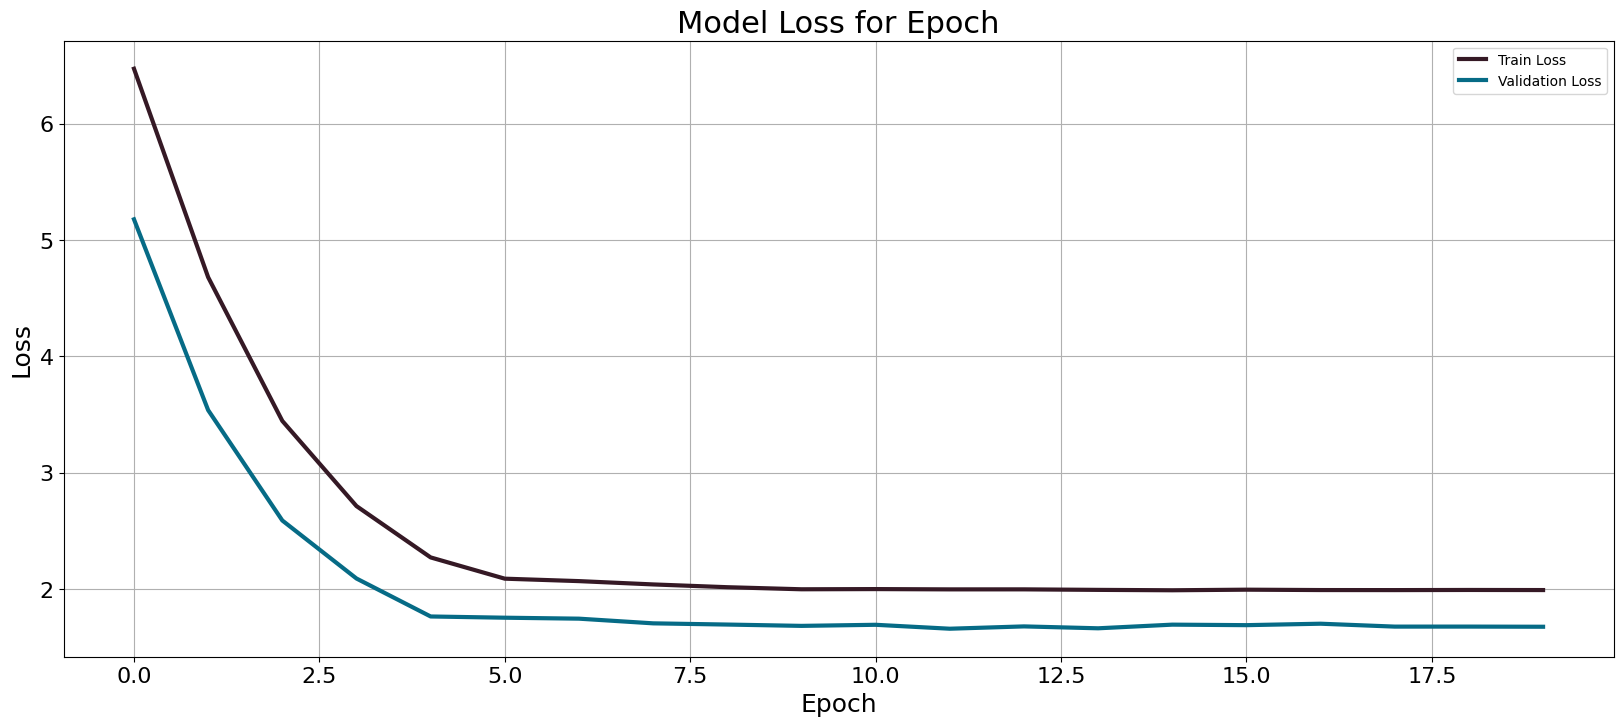

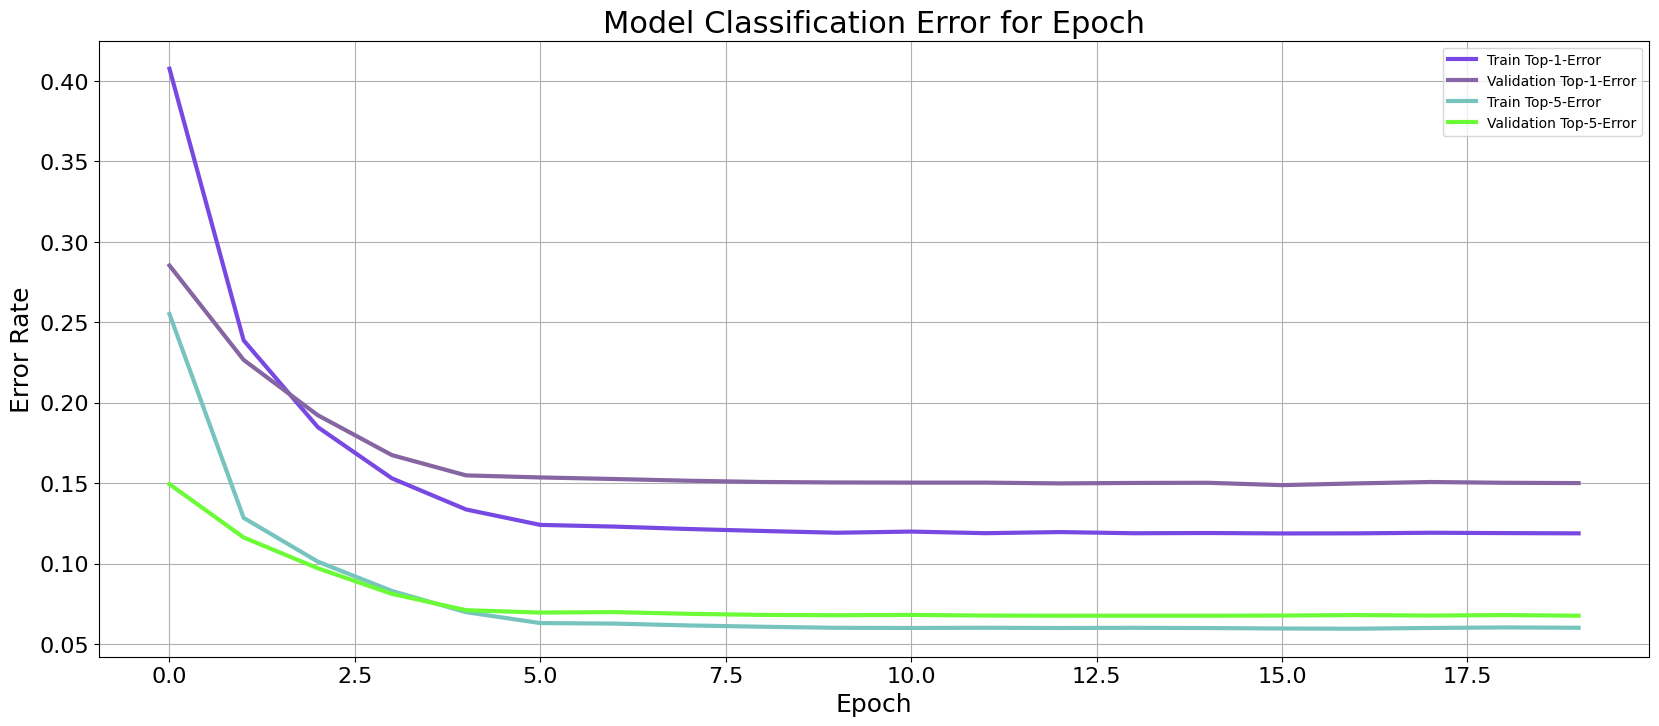


-- TRAINING --
Results
 - Loss: 1.990
 - Top-1-Accuracy: 0.88
 - Top-5-Accuracy: 0.94
 

-- VALIDATION --
Results
 - Loss: 1.675
 - Top-1-Accuracy: 0.85
 - Top-5-Accuracy: 0.93
 


In [3]:
import torch
import numpy as np
from utils import show_plot

# path to the saved model TO BE CHANGED
MODEL_PATH = './trained_models/lin_moco_resnet50_weights_car_models_nomlp_256.pth'
saved_model = torch.load(MODEL_PATH, map_location='cpu')

# resnet = ResNet(saved_model['resnet']['block'], saved_model['resnet']['layers'],
#                 len(total_set.classes)).to(params['device'])

# resnet.load_state_dict(saved_model['model_state_dict'])
train_losses = saved_model['train_losses']
train_acc = saved_model['train_acc']
train_top5_acc = saved_model['train_top5_acc']
validation_losses = saved_model['validation_losses']
validation_acc = saved_model['validation_acc']
validation_top5_acc = saved_model['validation_top5_acc']

# Plotting the performance of the model in the training and validation phase

plots = [
    (np.arange(0, len(train_losses), 1), train_losses, "Train Loss"),
    (np.arange(0, len(validation_losses), 1), validation_losses, "Validation Loss")
]

show_plot(plots, "Model Loss for Epoch", "Epoch", "Loss")

plots = [
    (np.arange(0, len(train_acc), 1), train_acc, "Train Top-1-Error"),
    (np.arange(0, len(validation_acc), 1), validation_acc, "Validation Top-1-Error"),
    (np.arange(0, len(train_top5_acc), 1), train_top5_acc, "Train Top-5-Error"),
    (np.arange(0, len(validation_top5_acc), 1), validation_top5_acc, "Validation Top-5-Error")
]

show_plot(plots, "Model Classification Error for Epoch", "Epoch", "Error Rate")

print("\n-- TRAINING --")
print("Results\n "
      "- Loss: {:.3f}\n "
      "- Top-1-Accuracy: {:.2f}\n "
      "- Top-5-Accuracy: {:.2f}\n ".format(
    train_losses[-1],
    1-train_acc[-1],
    1-train_top5_acc[-1]))

print("\n-- VALIDATION --")
print("Results\n "
      "- Loss: {:.3f}\n "
      "- Top-1-Accuracy: {:.2f}\n "
      "- Top-5-Accuracy: {:.2f}\n ".format(
    validation_losses[-1],
    1-validation_acc[-1],
    1-validation_top5_acc[-1]))